# Multivariate Regression Using Gradient Descent 

In [3]:
from google.colab import files
uploaded = files.upload()

Saving regressiondata.csv to regressiondata.csv


Import the dataset

In [0]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['regressiondata.csv']),header=None)
df.columns=["A", "B","C"]


**Data Cleaning:**
Check for null values or any missing values in the dataset

In [5]:
df.isnull().sum()

A    0
B    0
C    0
dtype: int64

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Identify the range of each column to see if normalization is essential. In this case the upper and lower bounds of the columns vary and hence mean normalisation is applied.

In [7]:
range_a=(min(df.A),max(df.A))
range_b=(min(df.B),max(df.B))
range_c=(min(df.C),max(df.C))
print(range_a)
print(range_b)
print(range_c)
# Mean Normalisation
df = (df - df.mean())/df.std()


(-8.86, 20.6)
(-2.89, 7.0)
(-10000.0, 202.0)


Multivariate Regression Model

A and B are the independent variables here and we need to express C as a function of A and B. Hence, consider the following cost function with coefficients $\Theta_0$,$\Theta_1$,$\Theta_2$.


$C$= $\Theta_0$+ $\Theta_1$*$A$+ $\Theta_2$*$B$

$\Theta$ is the vector consisting of parameters [$\Theta_0$,$\Theta_1$,$\Theta_2$]







In [0]:
# Matrix representation of the independent variables and vector representation of dependent variable
X = df.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
y = df.iloc[:,2:3].values

In [0]:
#Calculate the cost function
def costfunction(X,y,theta):
    cf = np.sum(np.power(((X @ theta.T)-y),2))/(2 * len(X))
    return cf

Gradient Descent Computation

In [0]:
#Compute the gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = costfunction(X, y, theta)
    
    return theta,cost



In [0]:
def function_plot(iters,cost):
  fig, ax = plt.subplots()  
  ax.plot(np.arange(iters), cost, 'b.')  
  ax.set_xlabel('Iterations')  
  ax.set_ylabel('Cost')  
  ax.set_title('Error vs Epochs') 

In [0]:
def predictedC(theta):
  pC=[]
  for i in range(len(df.A)):
    pC.append(theta[0,0]+theta[0,1]*df.iloc[i,0]+theta[0,2]*df.iloc[i,1])
  return pC 

Initialising coefficients and defining hyper parameters for the model

Theta is :  [[-2.08055795e-17 -7.81664574e-02 -8.47743533e-03]]
Minimized cost function is :  0.49531728832070326


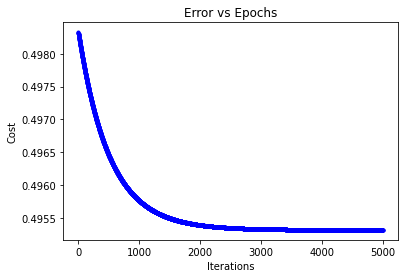

In [35]:

theta = np.zeros([1,3])
#Hyper parameters
alpha = 0.001
iters = 5000
theta,cost = gradientDescent(X,y,theta,iters,alpha)
print('Theta is : ', theta )
finalCost = costfunction(X,y,theta)
print('Minimized cost function is : ',finalCost)
function_plot(iters,cost)


MAE between actual and predicted C

In [36]:
pC=predictedC(theta)
print(np.sum(np.abs(df.C-pC))/len(X))


0.15883952419137426


Run the model with varied hyper parammeters : alpha=0.01, iters=1000

Theta is :  [[-2.05761334e-17 -7.90308664e-02 -9.15937637e-03]]
Minimized cost function is :  0.4953167802091263


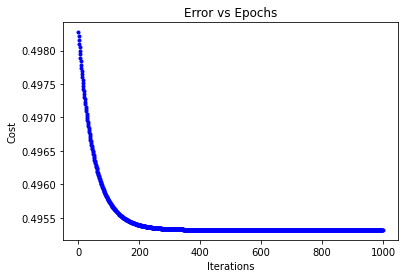

In [37]:
theta = np.zeros([1,3])
#Hyper parameters
alpha = 0.01
iters = 1000
theta,cost = gradientDescent(X,y,theta,iters,alpha)
print('Theta is : ', theta )
finalCost = costfunction(X,y,theta)
print('Minimized cost function is : ',finalCost)
function_plot(iters,cost)

By changing the hyper parameters, we notice that the model converges faster when the learning rate is 0.01 and this model does not take too many iterations to converge.

In [39]:
# MAE between actual and predicted C
pC=predictedC(theta)
print(np.sum(np.abs(df.C-pC))/len(X))

0.1587684112259373


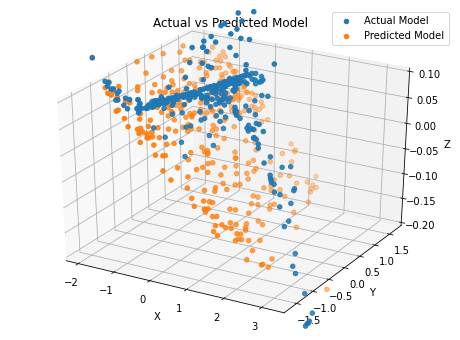

In [40]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection="3d")
ax.set_zlim([-0.2,0.1])
plt.title("Actual vs Predicted Model")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(df.A, df.B, df.C,'b',label='Actual Model')
ax.scatter(df.A, df.B, pC,'r',label='Predicted Model')
ax.legend()
plt.show()


This plot depicts Actual vs Predicted Model. The blue points belong to the actual model and the orange points belong to the model with predicted C values. Notice that the predictions are accurate in the dense regions of the actual model and the accuracy is good until the first standard deviation. This model can be made more accurate by adding more data points or by using a non-linear regression technique using ML packages. 